# Базовые библиотеки

In [1]:
import numpy as np

In [3]:
arr = np.array([1,2,3])

In [5]:
X = np.random.normal(size=(3,3))

In [6]:
X

array([[ 0.54831897,  1.19637874, -1.23159416],
       [ 0.23284288,  0.45788092,  0.10527494],
       [ 1.50826754, -0.33490692,  0.38647469]])

In [7]:
np.mean(X, axis = 1)#среднее по строкам

array([0.17103451, 0.26533291, 0.5199451 ])

numpy быстрее работает

In [8]:
a,b = np.random.normal(size = (1000000,)), np.random.normal(size = (1000000,))

In [11]:
%%time
res = a.dot(b)

Wall time: 2 ms


In [12]:
%%time
scalar = 0
for a_el, b_el in zip(a,b):
    scalar += a_el*b_el

Wall time: 321 ms


Модуль linalg

In [14]:
np.linalg.eig(X) # собственные числа и собственные векторы

(array([0.3731491 +1.27771998j, 0.3731491 -1.27771998j,
        0.64637637+0.j        ]),
 array([[-0.01770106-0.63103949j, -0.01770106+0.63103949j,
         -0.26945192+0.j        ],
        [-0.1101228 +0.07349019j, -0.1101228 -0.07349019j,
         -0.70139149+0.j        ],
        [-0.7641649 +0.j        , -0.7641649 -0.j        ,
         -0.65988305+0.j        ]]))

In [17]:
X[X>0]

array([0.54831897, 1.19637874, 0.23284288, 0.45788092, 0.10527494,
       1.50826754, 0.38647469])

In [19]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Example')

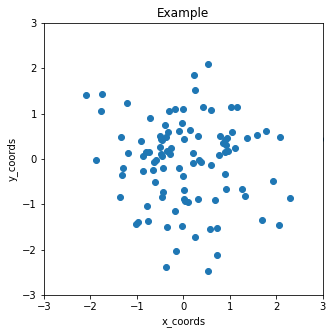

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(np.random.normal(size=100), np.random.normal(size = 100))
plt.xlabel("x_coords")
plt.ylabel("y_coords")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title("Example")

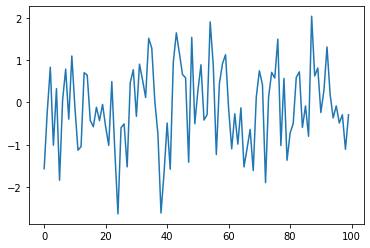

In [26]:
plt.plot(np.arange(100), np.random.normal(size = 100))

(array([ 1.,  7., 14., 26., 18., 16., 11.,  7.]),
 array([-2.56526921, -2.00016337, -1.43505753, -0.86995169, -0.30484585,
         0.26025999,  0.82536583,  1.39047168,  1.95557752]),
 <a list of 8 Patch objects>)

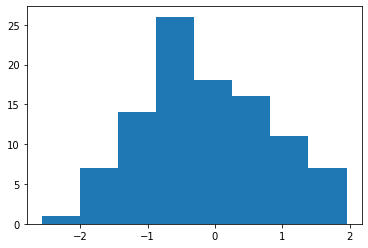

In [27]:
plt.hist(np.random.normal(size = 100), bins = 8)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a21f5128d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a21f512fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a21f512518>],
 'medians': [<matplotlib.lines.Line2D at 0x1a21f51d6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a21f51d9e8>],
 'means': []}

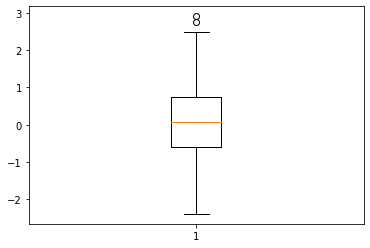

In [28]:
plt.boxplot(np.random.normal(size = 100))

In [30]:
from sklearn.datasets import load_boston

In [31]:
boston = load_boston()

In [32]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [33]:
X = boston.data
Y = boston.target

Text(0, 0.5, 'Price')

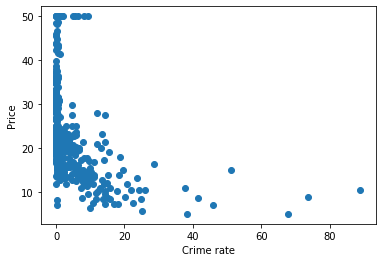

In [34]:
plt.scatter(X[:,0],Y)
plt.xlabel('Crime rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

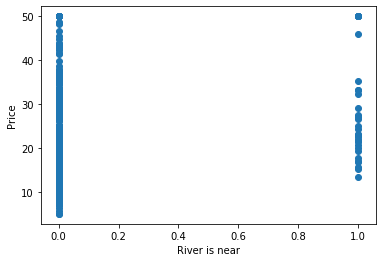

In [36]:
plt.scatter(X[:,3],Y)
plt.xlabel('River is near')
plt.ylabel('Price')

Supervised learning - обучение с учителем


In [37]:
from sklearn.model_selection import train_test_split

In [54]:
np.random.seed(2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
knn = KNeighborsRegressor(n_neighbors=3)

In [43]:
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [44]:
knn.predict(X_test)

array([21.5       , 28.6       , 20.73333333, 16.8       , 26.63333333,
       27.56666667, 21.5       , 27.56666667, 20.23333333, 23.83333333,
       18.9       , 20.43333333, 26.63333333, 14.03333333, 30.8       ,
        9.        , 29.73333333, 23.        , 31.66666667, 32.        ,
       20.76666667, 13.26666667, 31.1       , 16.83333333, 34.7       ,
       26.63333333, 21.2       , 23.63333333, 28.56666667, 22.23333333,
       22.83333333, 23.73333333, 19.26666667, 17.66666667, 31.93333333,
       30.86666667, 16.06666667, 14.03333333, 33.36666667, 33.3       ,
       30.83333333, 35.9       , 25.73333333, 16.06666667, 45.1       ,
       18.26666667, 14.13333333, 21.63333333, 40.5       , 18.46666667,
       34.46666667, 19.5       , 11.83333333,  7.        , 17.6       ,
       22.23333333, 21.03333333, 27.23333333,  8.93333333, 19.6       ,
       17.6       , 21.6       , 18.23333333, 22.56666667, 19.76666667,
       19.46666667, 30.36666667, 26.16666667, 19.6       , 25.06

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
mean_absolute_error(Y_test, knn.predict(X_test))

4.84640522875817

In [56]:
result = []
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, Y_train)
    result.append(mean_absolute_error(Y_test, knn.predict(X_test)))

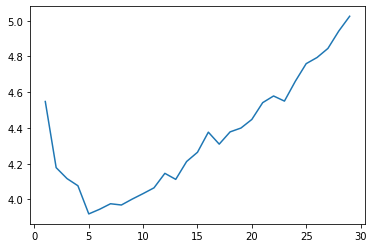

In [57]:
plt.plot(range(1,30), result)